## Problema 1

In [21]:
"""
Aplicar el algorimto KNN para la data mostrada
"""

import pandas
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np



dataset = pandas.read_csv("https://raw.githubusercontent.com/pedrorotta/PythonIntermedio2022/main/clase2/classification.csv")
dataset.head()

,age,interest,success
0,23.657801,18.859917,0.0
1,22.573729,17.969223,0.0
2,32.553424,29.463651,0.0
3,6.718035,25.704665,1.0
4,14.401919,16.770856,0.0


###Hacer una dispersión de datos general

In [22]:
fig1 = px.scatter(dataset,x = 'age', y = 'interest', color = 'success')
fig1.update_traces(marker_size = 10)

### Dividir el modelo en train y test.

In [23]:
# Separar el target (labels )de los features
age_array = np.array(dataset['age'])
interest_array = np.array(dataset['interest'])
X = np.c_[age_array,interest_array]
y = np.array(dataset['success'])

In [24]:
#Analizar la dimensionalidad vectorial 
print(np.shape(X))
print('-'*100)
print(np.shape(y))
y = np.reshape(y,(297,1))
print(np.shape(y))

(297, 2)
----------------------------------------------------------------------------------------------------
(297,)
(297, 1)


In [25]:
# Dividimos la data
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.model_selection import train_test_split as tts

Xtrain,Xtest,ytrain,ytest = tts(X,y,test_size = 0.30, random_state = 42)

### Entrenamiento de la data (Ajuste) 

In [26]:
#Crear el modelo
modeloKNN = knn(n_neighbors=3)
modeloKNN.fit(Xtrain,ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



KNeighborsClassifier(n_neighbors=3)

In [27]:
modeloKNN

KNeighborsClassifier(n_neighbors=3)

## Validación del modelo

In [28]:
np.shape(Xtest)

(90, 2)

In [31]:
from sklearn.metrics import recall_score, precision_score, confusion_matrix

#Hacer una predicción de los valores de prueba

ypredi1 = modeloKNN.predict(Xtest) #Para test
ypredtrain = modeloKNN.predict(Xtrain) #Para train 
#score_total

score_totaltrain = modeloKNN.score(Xtrain,ytrain)
recallscoretrain  = recall_score(ytrain,ypredtrain)
precisionscoretrain = precision_score(ytrain,ypredtrain)

print("El score en entrenamiento es",score_totaltrain)
print("El recall en entrenamiento es",recallscoretrain)
print("La precision en entrenamiento es",precisionscoretrain)

#####################################################################

score_totalvalidation = modeloKNN.score(Xtest,ytest)
recallscoreval  = recall_score(ytest,ypredi1)
precisionscoreval = precision_score(ytest,ypredi1)

print("#"*100)

print("El score en validación es",score_totalvalidation)
print("El recall en validación es",recallscoreval)
print("La precision en validación es",precisionscoreval)





El score en entrenamiento es 0.9468599033816425
El recall en entrenamiento es 0.9433962264150944
La precision en entrenamiento es 0.9523809523809523
####################################################################################################
El score en validación es 0.9444444444444444
El recall en validación es 0.9523809523809523
La precision en validación es 0.967741935483871


In [36]:
scoretrain = []
recalltrain = []
scoreval = []
recallval = []
for k in [1,3,5,7]:
  modeloKNN = knn(n_neighbors=k)
  modeloKNN.fit(Xtrain,ytrain)
  ypredi1 = modeloKNN.predict(Xtest) #Para test
  ypredtrain = modeloKNN.predict(Xtrain) #Para train 
  score_totaltrain = modeloKNN.score(Xtrain,ytrain)
  scoretrain.append(round(score_totaltrain,2))
  recallscoretrain  = recall_score(ytrain,ypredtrain)
  recalltrain.append(round(recallscoretrain,2))
  score_totalvalidation = modeloKNN.score(Xtest,ytest)
  scoreval.append(round(score_totalvalidation,2))
  recallscoreval  = recall_score(ytest,ypredi1)
  recallval.append(round(recallscoreval,2))
print(scoretrain)
print(recalltrain)
print(scoreval)
print(recallval)

[1.0, 0.95, 0.94, 0.94]
[1.0, 0.94, 0.93, 0.93]
[0.96, 0.94, 0.94, 0.96]
[0.97, 0.95, 0.95, 0.95]


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



In [ ]:
"""
Aplicar el método KNN para el dataset iris
"""

'\nAplicar el método KNN para el dataset iris\n'

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



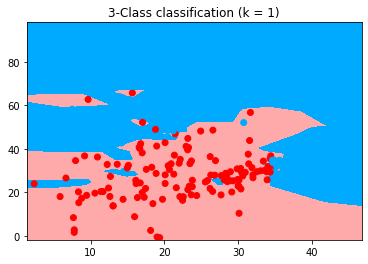

In [32]:
import matplotlib
#matplotlib.use('GTKAgg')

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighborss = 1

# import some data to play with

h = .02

modeloKNN = knn(n_neighbors= n_neighborss)
modeloKNN.fit(Xtrain,ytrain)
# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00','#00AAFF'])

# we create an instance of Neighbours Classifier and fit the data.

# calculate min, max and limits
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
np.arange(y_min, y_max, h))

# predict class using data and kNN classifier
Z = modeloKNN.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification (k = %i)" % (n_neighborss))
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



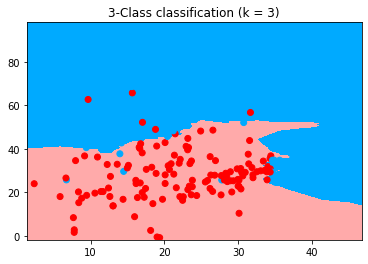

In [33]:
import matplotlib
#matplotlib.use('GTKAgg')

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighborss = 3

# import some data to play with

h = .02

modeloKNN = knn(n_neighbors= n_neighborss)
modeloKNN.fit(Xtrain,ytrain)
# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00','#00AAFF'])

# we create an instance of Neighbours Classifier and fit the data.

# calculate min, max and limits
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
np.arange(y_min, y_max, h))

# predict class using data and kNN classifier
Z = modeloKNN.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification (k = %i)" % (n_neighborss))
plt.show()